0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
[0.  0.  0.  0.  1.  0.5 0.  0.  0.  0. ]
[0.  0.  0.  0.  1.  0.5 0.  0.  0.  0. ]
[0.  0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
[0.  0.  0.  0.  0.5 0.5 0.  1.  0.  0. ]
[0.  1.  0.  0.  0.5 0.5 0.  1.  0.  0. ]
------
+++++++
804


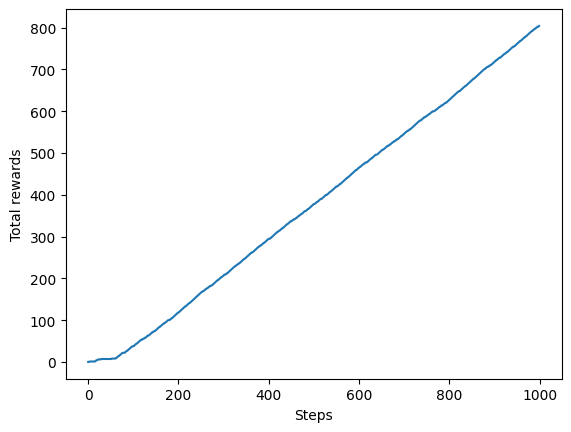

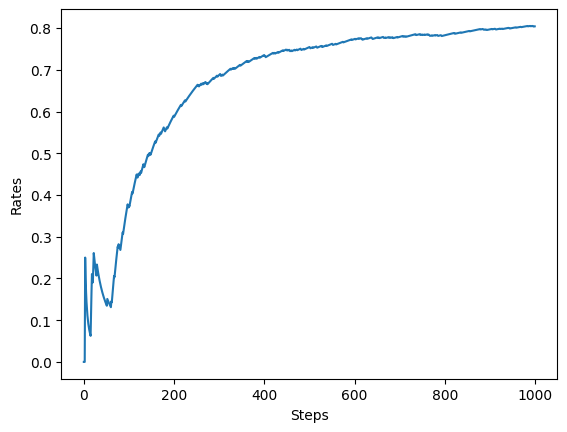

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Bandit:
    def __init__(self, n_arms=10):
        self.rates = np.random.rand(n_arms)
       # print(self.rates)

    def play(self, arm):
        rate = self.rates[arm]
        if rate > np.random.rand():
            return 1
        else:
            return 0


class Agent:
    def __init__(self, epsilon, action_size=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)

    def update(self, action, reward):
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]

    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)

bandit = Bandit()
for i in range(3):
    print(bandit.play(0))

#에이전트 구현
Q = 0
for n in range(1, 11):
    reward = bandit.play(0)
    Q += (reward - Q) / n
    print(Q)

#슬롯머신 추정치 구현

Qs = np.zeros(10)
ns = np.zeros(10)

for n in range(10):
    action = np.random.randint(0, 10)
    reward = bandit.play(action)

    ns[action] += 1
    Qs[action] += (reward - Qs[action]) / ns[action]
    print(Qs)



steps = 1000
epsilon = 0.1

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = []
rates = []

print("------")

for step in range(steps):
    action = agent.get_action()
    reward = bandit.play(action)
    agent.update(action, reward)
    total_reward += reward
    total_rewards.append(total_reward)
    rates.append(total_reward / (step + 1))


print("+++++++")
print(total_reward)

plt.ylabel('Total rewards')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()